In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
cifar10.data_path = "data/CIFAR-10/"

In [4]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [5]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [7]:
print(images_train.shape)
df = pd.DataFrame(labels_train)
df.head()

(50000, 32, 32, 3)


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
images_train.shape,cls_train.shape,labels_train.shape

((50000, 32, 32, 3), (50000,), (50000, 10))

In [9]:
print(images_train[0][0][0],cls_train[0],labels_train[0])

[0.23137255 0.24313725 0.24705882] 6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
images_test.shape

(10000, 32, 32, 3)

In [11]:
def plot_images(data):
    fig = plt.figure(figsize=(16,16))
    for i in range(64):
        ax = fig.add_subplot(16,16,i+1)
        ax.imshow(data[i],cmap = plt.cm.bone)
    plt.show()

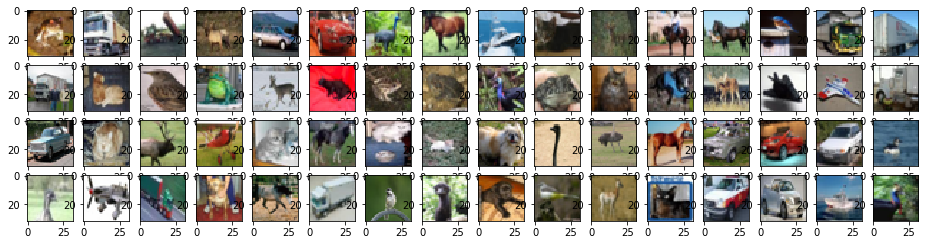

In [11]:
plot_images(images_train)

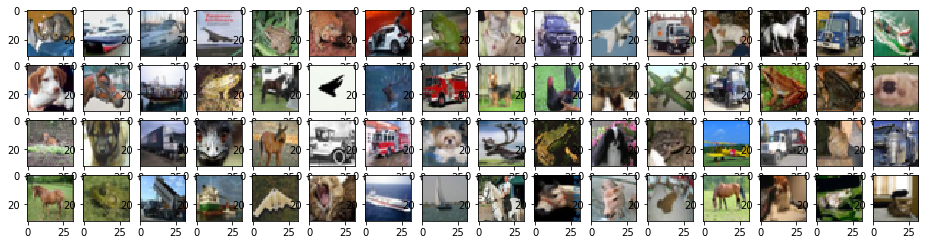

In [12]:
plot_images(images_test)

In [12]:
images_train = images_train.reshape(50000,32*32*3)
images_test = images_test.reshape(10000,32*32*3)

In [13]:
pca = PCA()
pca.fit(images_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
#95 variance
k = 0 
total = sum(pca.explained_variance_)
cur_sum = 0
while cur_sum/total < 0.95:
    cur_sum += pca.explained_variance_[k]
    k = k+1
k

217

In [15]:
pca_images = PCA(n_components = k,whiten = True)
images_train_transformed = pca_images.fit_transform(images_train)

In [16]:
print(images_train_transformed.shape)
print(pca_images.components_.shape)

(50000, 217)
(217, 3072)


In [17]:
images_train_inverse = pca_images.inverse_transform(images_train_transformed)
images_train_inverse = images_train_inverse.reshape((50000,32,32,3))
images_train_inverse.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

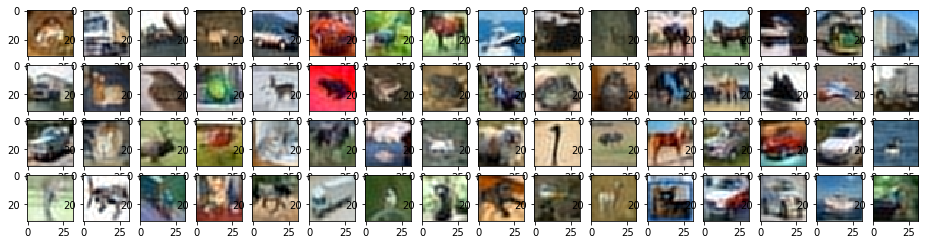

In [19]:
plot_images(images_train_inverse)

In [18]:
eigen_spaces = pca_images.components_
eigen_spaces = eigen_spaces.reshape((217,32,32,3))

In [19]:
y_train_img = np.zeros((50000))
for i in range(labels_train.shape[0]):
    for j in range(labels_train.shape[1]):
        if labels_train[i][j] == 1:
            y_train_img[i] = j
            

In [20]:
y_test_img = np.zeros((10000))
for i in range(labels_test.shape[0]):
    for j in range(labels_test.shape[1]):
        if labels_test[i][j] == 1:
            y_test_img[i] = j

In [21]:
x_train_img = images_train_transformed
x_test_img = pca_images.transform(images_test)

In [22]:
print(x_train_img.shape)
print(y_train_img.shape)
print(y_test_img.shape)

(50000, 217)
(50000,)
(10000,)


In [31]:
#GridSearchCV on svm classifier
svc = svm.SVC()
grid = {'C':[1e2,1e3,5e3],'gamma':[1e-2,1e-3]}
best_svc = GridSearchCV(svc,param_grid = grid,cv=3)
best_svc.fit(x_train_img,y_train_img)
best_svc.best_estimator_

KeyboardInterrupt: 

In [ ]:
#GridSearchCV on random forest classifier
rfc = RandomForestClassifier(oob_score = True,n_jobs = -1,random_state = 1)
param_grid = {'n_estimators': [100,200],'max_features':['auto','log2'],'min_samples_leaf':[30,50]}
best_rfc = GridSearchCV(rfc,param_grid,cv=3)
best_rfc.fit(x_train_img,y_train_img)
best_rfc.best_estimator_

In [30]:
#Svm Classifier
svc = svm.SVC(C=1.0,gamma = 'scale',decision_function_shape = 'ovo',kernel='rbf')
svc.fit(x_train_img,y_train_img)
y_pred_img_svc = svc.predict(x_test_img)

In [23]:
#using random forest classifier
rfc = RandomForestClassifier(oob_score = True,n_jobs = -1,n_estimators = 100,min_samples_leaf = 10,max_features = 'auto',min_samples_leaf=10)
rfc.fit(x_train_img,y_train_img)
y_pred_img_rfc= rfc.predict(x_test_img)

In [32]:
print(classification_report(y_test_img,y_pred_img_svc))

              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61      1000
         1.0       0.63      0.68      0.66      1000
         2.0       0.44      0.42      0.43      1000
         3.0       0.40      0.42      0.41      1000
         4.0       0.51      0.45      0.48      1000
         5.0       0.47      0.46      0.47      1000
         6.0       0.59      0.62      0.60      1000
         7.0       0.65      0.58      0.61      1000
         8.0       0.68      0.66      0.67      1000
         9.0       0.55      0.64      0.59      1000

   micro avg       0.55      0.55      0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



In [34]:
print(y_test_img)
y_pred_img2 = [int(i) for i in y_pred_img_svc]
print(len(y_pred_img2))

[3. 8. 8. ... 5. 1. 7.]
10000


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_names)
print(le.classes_)
le.transform(class_names)

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [36]:
y_pred_classes = list(le.inverse_transform(y_pred_img2))
print(y_pred_classes[0:10])

['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


In [37]:
np.savetxt("cifar_pred.csv",y_pred_classes,fmt="%s")